# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 598


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"lat={city.lat}&lon={city.lng}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city.city_name))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url + city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city.city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | springbok
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | sainyabuli
Processing Record 4 of Set 1 | urzhar
Processing Record 5 of Set 1 | iskateley
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | adamstown
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | iqaluit
Processing Record 10 of Set 1 | palmer
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | yuzhno-kurilsk
Processing Record 13 of Set 1 | wanning
Processing Record 14 of Set 1 | udachny
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | lihue
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | qui nhon
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | iquitos
Processing Record

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,springbok,-29.6643,17.8865,14.13,13,0,5.04,ZA,1693167653
1,grytviken,-54.2811,-36.5092,-2.06,84,35,4.16,GS,1693167160
2,sainyabuli,19.2576,101.7103,22.29,98,100,0.28,LA,1693167654
3,urzhar,47.0930,81.6294,23.84,41,100,2.03,KZ,1693167654
4,iskateley,67.6803,53.1512,6.66,94,100,3.06,RU,1693167065


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,springbok,-29.6643,17.8865,14.13,13,0,5.04,ZA,1693167653
1,grytviken,-54.2811,-36.5092,-2.06,84,35,4.16,GS,1693167160
2,sainyabuli,19.2576,101.7103,22.29,98,100,0.28,LA,1693167654
3,urzhar,47.0930,81.6294,23.84,41,100,2.03,KZ,1693167654
4,iskateley,67.6803,53.1512,6.66,94,100,3.06,RU,1693167065


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [13]:
# set the current date variable for use by the scatter plot titles
current_date = time.strftime("%Y-%m-%d")

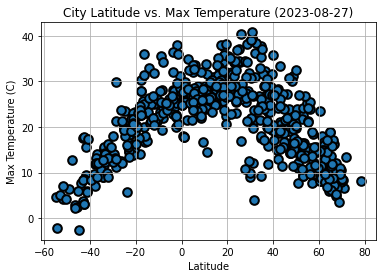

In [14]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({current_date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

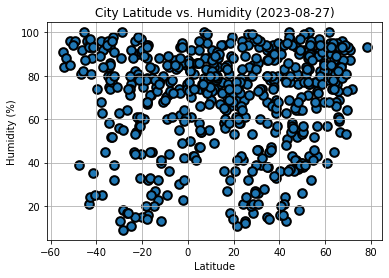

In [15]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({current_date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

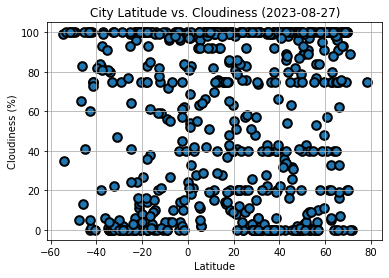

In [16]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({current_date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

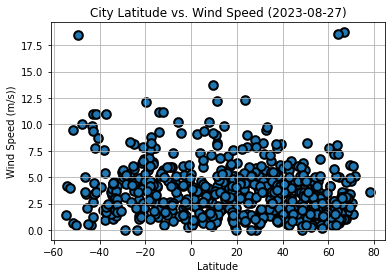

In [17]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, s=75, edgecolors="black", linewidths=2)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s))")
plt.title(f"City Latitude vs. Wind Speed ({current_date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots

def compute_and_plot_regression(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # if the slope is negative, add the annotation in the bottom left corner
    # otherwise put it in the bottom right corner
    if (slope < 0):
        line_x = x_values.min()
        line_y = y_values.min()
    else:
        line_x = (x_values.min() + x_values.max()) / 2
        line_y = y_values.min()
    
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(line_x, line_y), fontsize=15, color="red")
    print(f'The r-value is {rvalue**2}')

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sainyabuli,19.2576,101.7103,22.29,98,100,0.28,LA,1693167654
3,urzhar,47.0930,81.6294,23.84,41,100,2.03,KZ,1693167654
4,iskateley,67.6803,53.1512,6.66,94,100,3.06,RU,1693167065
8,iqaluit,63.7470,-68.5173,9.07,45,40,8.05,CA,1693167074
9,palmer,61.5994,-149.1146,17.95,82,100,1.54,US,1693167091


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,springbok,-29.6643,17.8865,14.13,13,0,5.04,ZA,1693167653
1,grytviken,-54.2811,-36.5092,-2.06,84,35,4.16,GS,1693167160
5,edinburgh of the seven seas,-37.0676,-12.3116,14.03,92,100,10.96,SH,1693167087
6,adamstown,-25.0660,-130.1015,19.73,80,64,8.14,PN,1693166880
7,waitangi,-43.9535,-176.5597,7.68,96,100,0.45,NZ,1693167086


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.48587795397247363


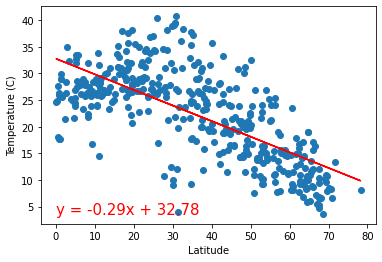

In [21]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
compute_and_plot_regression(x_values, y_values, "Latitude", "Temperature (C)")

The r-value is 0.7237059327373851


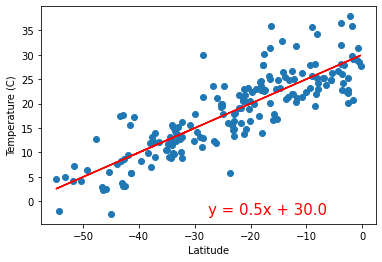

In [22]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
compute_and_plot_regression(x_values, y_values, "Latitude", "Temperature (C)")

**Discussion about the linear relationship:**

In the northern hemisphere, there is a moderate correlation (0.5 < r < 0.7) between temperature and location relative to the equator.  This is because it is summer in the northern hemisphere and there were recent heat waves across the United States, which can been seen around latitude 30.

In the southern hemisphere, there is a strong correlation (r > 0.7) between temperature and location relative to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.010142825308411091


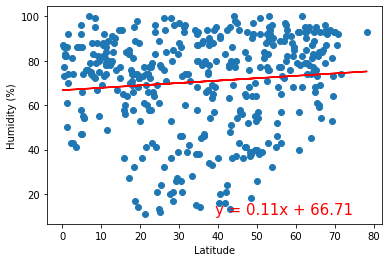

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
compute_and_plot_regression(x_values, y_values, "Latitude", "Humidity (%)")

The r-value is 0.02915972061407316


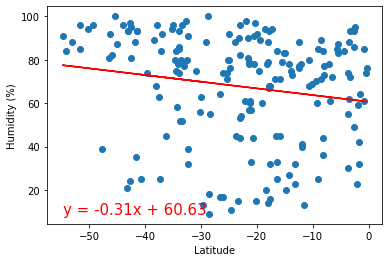

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
compute_and_plot_regression(x_values, y_values, "Latitude", "Humidity (%)")

**Discussion about the linear relationship:** 

In both hemispheres, there is no or a very weak correlation (r < 0.3) between humidity and location relative to the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.00019342524283910557


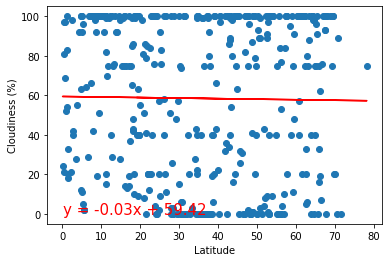

In [25]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
compute_and_plot_regression(x_values, y_values, "Latitude", "Cloudiness (%)")

The r-value is 0.0007831192782065796


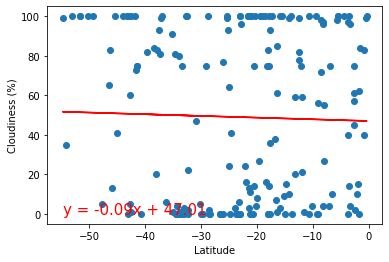

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
compute_and_plot_regression(x_values, y_values, "Latitude", "Cloudiness (%)")

**Discussion about the linear relationship:**

In both hemispheres there is no or very weak correlation (r < 0.3) between cloudiness and location relative to the equator.  In fact, in both cases, the r value is essentially 0, which solidifies there is no correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0115573850699607


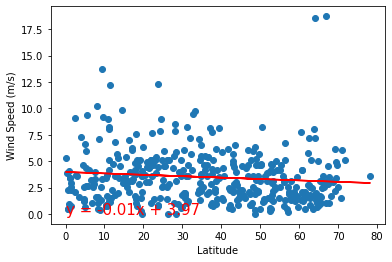

In [27]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
compute_and_plot_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)")

The r-value is 0.008600234383358331


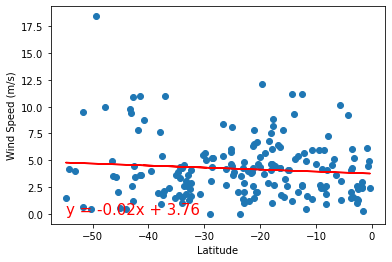

In [28]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
compute_and_plot_regression(x_values, y_values, "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:**

In both hemispheres there is no correlation (r < 0.3) between wind speed and location relative to the equator.  In fact, in both cases, the r value is essentially 0, which solidifies there is no correlation.